In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('analise.csv')

In [3]:
df.head()

,ret1
0,2.972492
1,-0.415253
2,-2.531626
3,2.339222
4,-0.715065


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4004 entries, 0 to 4003
Data columns (total 1 columns):
ret1    4004 non-null float64
dtypes: float64(1)
memory usage: 31.4 KB


In [5]:
df.describe()

,ret1
count,4004.000000
mean,0.056192
std,1.531471
min,-10.244770
25%,-0.707488
50%,0.053705
75%,0.803970
max,12.208528


# Checking Outliers using Boxplot and KDEplot

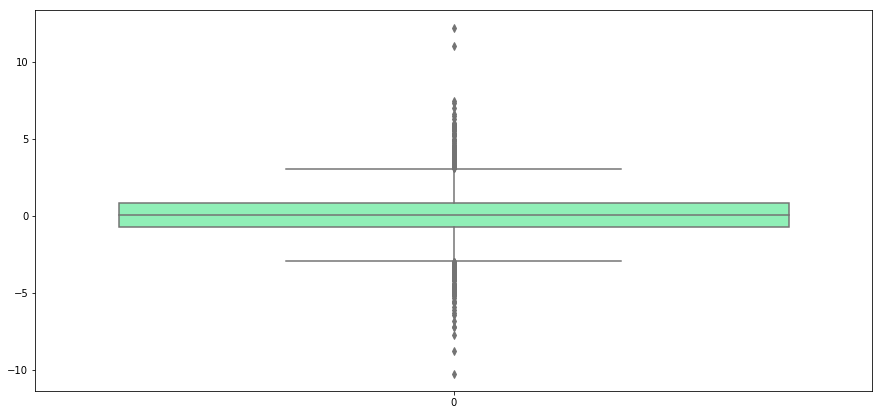

In [6]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df['ret1'], palette='rainbow')

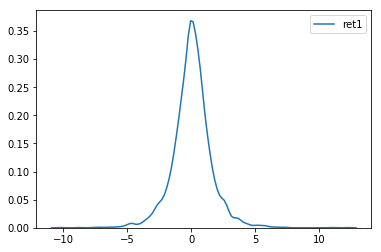

In [7]:
sns.kdeplot(df['ret1'])

# Outlier Detection using Standard Deviation

We are detecting outliers using Standard Deviation techniques. Our approach is to remove the outlier points by eliminating any points that are above (Mean + 2*SD) and any points below (Mean - 2*SD)

In [8]:
def outDetection(df, column_name):
    elements = np.array(df[column_name])
    mean = np.mean(elements, axis=0)  #mean of data
    sd = np.std(elements, axis=0)     #standard deviation of data
    list_l = [i for i, y in enumerate(elements) if (y < mean - 2*sd)]
    list_m = [i for i, x in enumerate(elements) if (x > mean + 2*sd)]

    total_n = list_l + list_m
    return total_n

In [9]:
a = outDetection(df, 'ret1')

In [10]:
print(a) #position of outliers

[57, 74, 106, 107, 117, 147, 158, 300, 319, 344, 421, 427, 457, 476, 562, 583, 587, 600, 601, 617, 641, 660, 661, 667, 669, 674, 685, 700, 701, 719, 727, 729, 732, 757, 774, 785, 846, 853, 862, 872, 874, 881, 887, 891, 896, 902, 904, 928, 944, 947, 954, 959, 961, 967, 971, 976, 1035, 1088, 1103, 1168, 1173, 1199, 1219, 1223, 1240, 1259, 1265, 1272, 1279, 1293, 1297, 1301, 1319, 1340, 1346, 1360, 1426, 1982, 1985, 1996, 2558, 2629, 2630, 2644, 2665, 2677, 2681, 2795, 2833, 2854, 2855, 2858, 2860, 2864, 2868, 2869, 2879, 2882, 2889, 2890, 2896, 2899, 2929, 2952, 3574, 37, 62, 103, 108, 227, 297, 320, 327, 333, 351, 353, 369, 378, 383, 406, 431, 432, 438, 481, 495, 504, 528, 588, 619, 627, 628, 657, 668, 705, 714, 718, 722, 730, 734, 735, 750, 763, 765, 773, 780, 794, 820, 832, 845, 847, 854, 863, 866, 875, 879, 903, 909, 919, 920, 925, 936, 948, 956, 966, 980, 992, 1086, 1093, 1117, 1137, 1195, 1242, 1274, 1276, 1281, 1288, 1295, 1306, 1310, 1312, 1313, 1343, 1350, 1356, 1379, 1380, 1455

In [11]:
df2 = df.drop(df.index[a]) #dropping the outliers

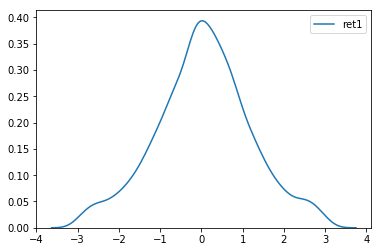

In [12]:
sns.kdeplot(df2['ret1']) #plotting the data after removing outliers

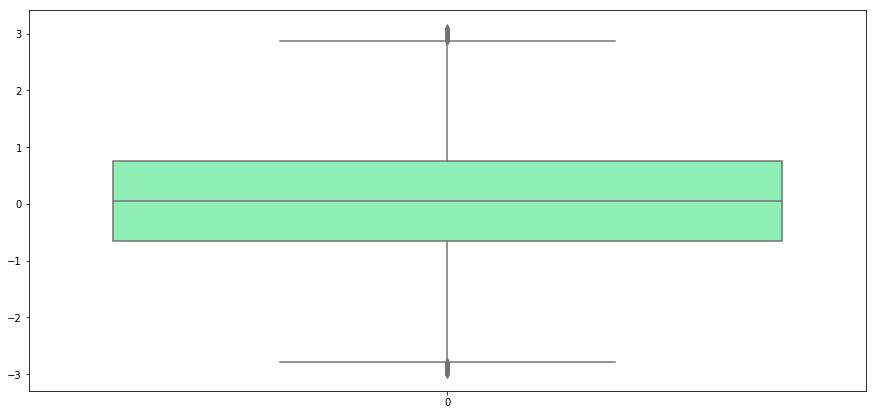

In [13]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df2['ret1'], palette='rainbow')

# End